In [1]:
# IMPORTING NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge,Lasso,RidgeCV , LassoCV
from sklearn.metrics import r2_score
from xgboost import XGBRFRegressor

In [2]:
#IMPORTING DATABASE
df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [104]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [105]:
df.shape

(1338, 7)

In [106]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [107]:
df.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [108]:
# Checking types of columns
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [109]:
# Checking null values 
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [110]:
df.isnull().sum().sum()

0

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [112]:
# Description of dataset (Categorical):
df.describe(include=['O'])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [113]:
df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Axes: >

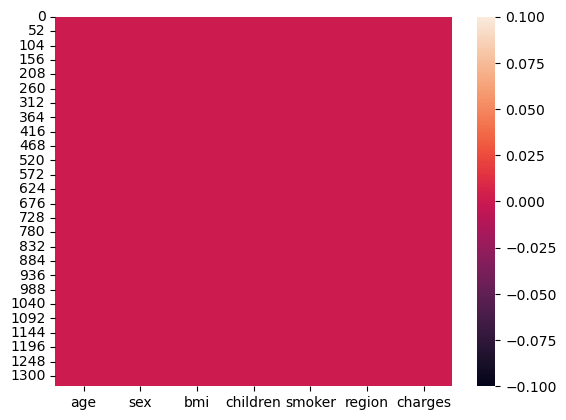

In [15]:
# Lets visualise  database with heatmap
sns.heatmap(df.isnull())

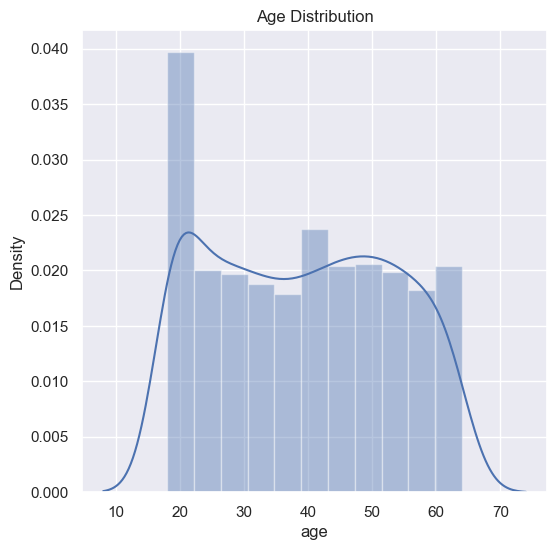

In [115]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

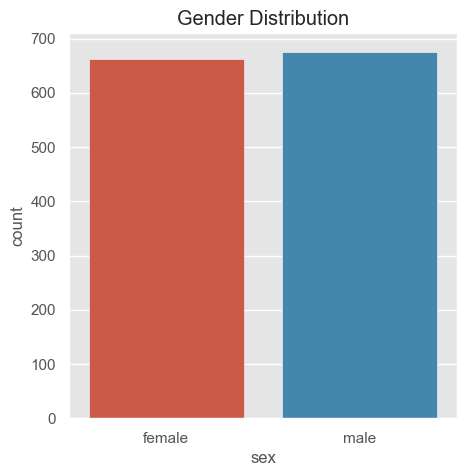

In [116]:
plt.figure(figsize=(5,5))
style.use('ggplot')
sns.countplot(x='sex', data=df)
plt.title('Gender Distribution')
plt.show()

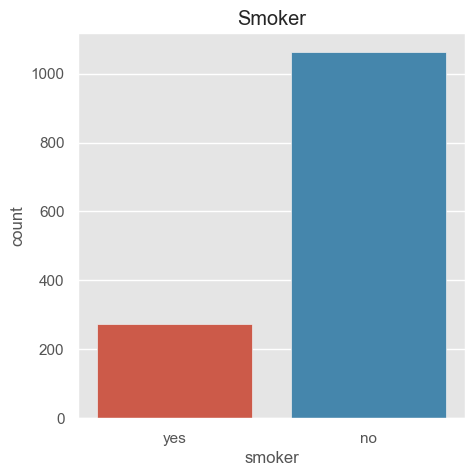

In [117]:
plt.figure(figsize=(5,5))
sns.countplot(x='smoker', data=df)
plt.title('Smoker')
plt.show()

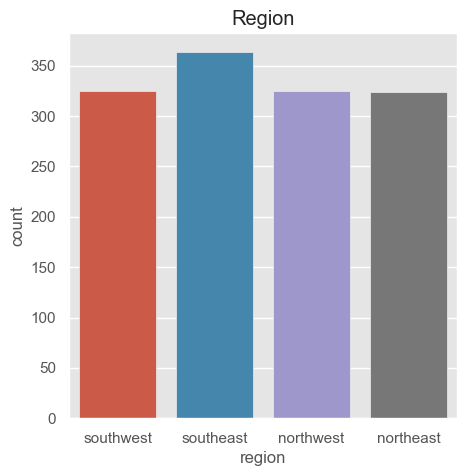

In [118]:
plt.figure(figsize=(5,5))
sns.countplot(x='region', data=df)
plt.title('Region')
plt.show()

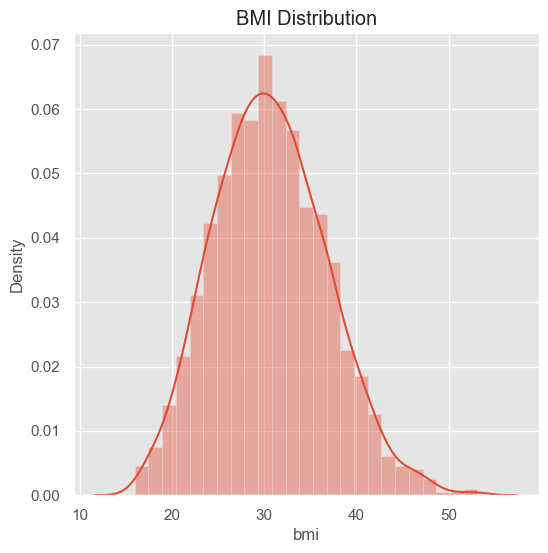

In [119]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()
     

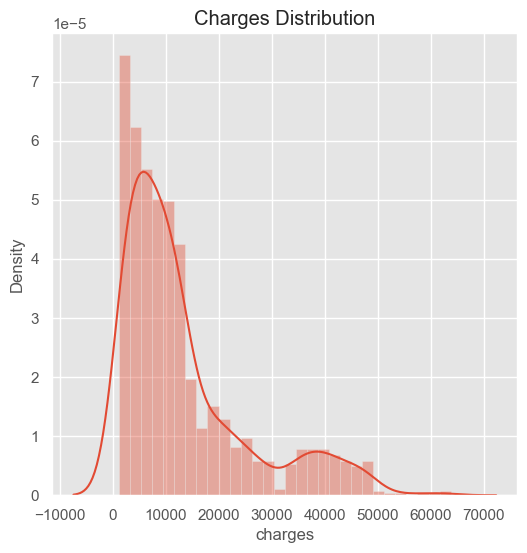

In [120]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('Charges Distribution')
plt.show()

Text(0.5, 1.0, 'Cost vs Region')

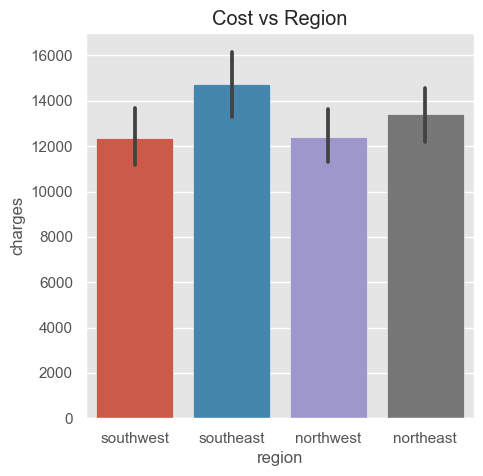

In [121]:
plt.figure(figsize=(5,5))
sns.barplot(x='region', y='charges', data=df)
plt.title('Cost vs Region')

Text(0.5, 1.0, 'Charges for smokers')

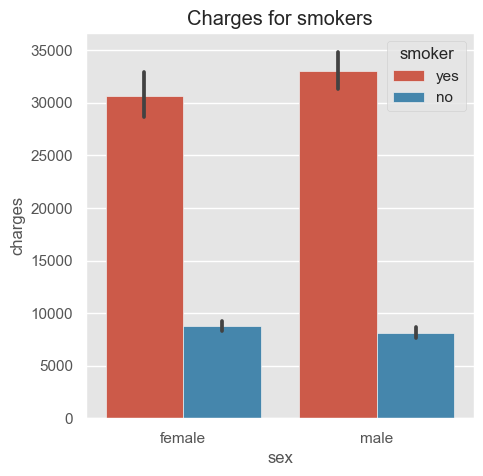

In [122]:
plt.figure(figsize=(5,5))
sns.barplot(x='sex', y='charges',hue='smoker', data=df)
plt.title('Charges for smokers')

<Axes: xlabel='region', ylabel='charges'>

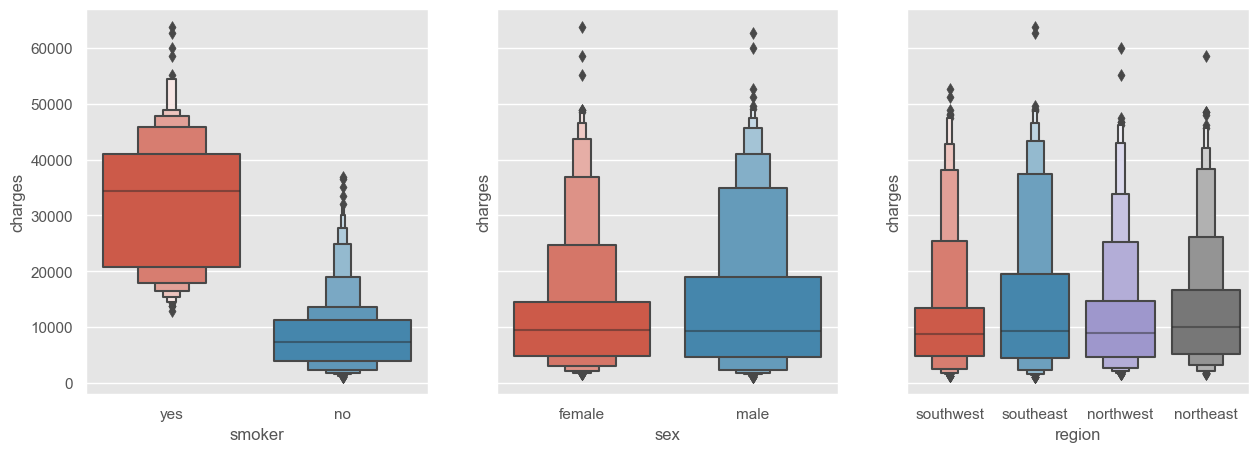

In [123]:
fig, axes = plt.subplots(1,3, figsize=(15,5), sharey=True)
sns.boxenplot(x='smoker', y= 'charges', data=df, ax=axes[0])
sns.boxenplot(x='sex', y= 'charges', data=df, ax=axes[1])
sns.boxenplot(x='region', y= 'charges', data=df, ax=axes[2])

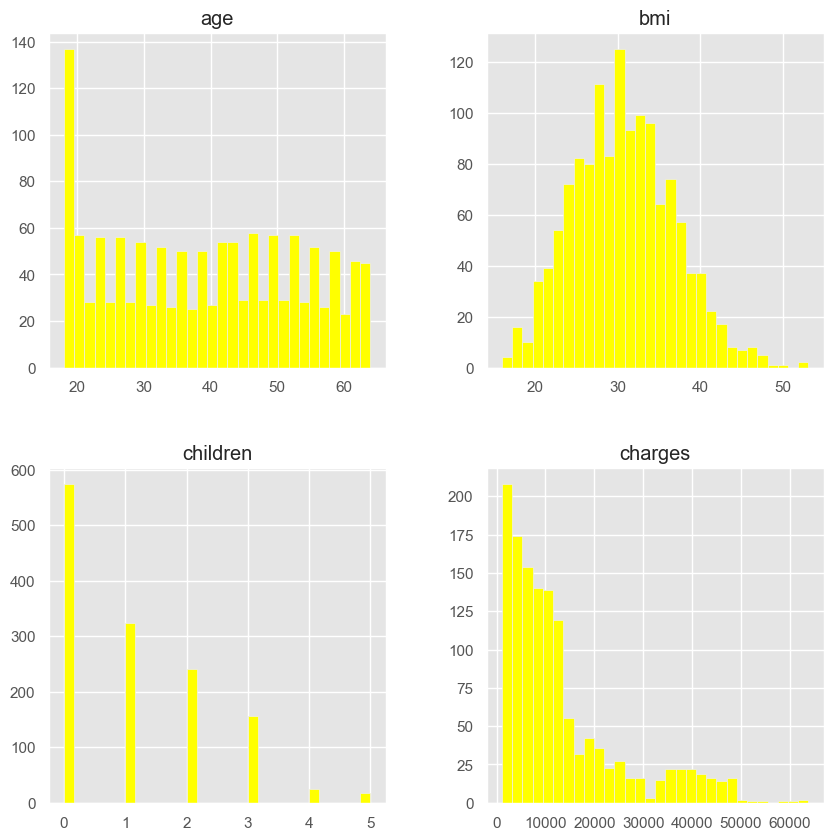

In [124]:
df[['age','bmi','children','charges']].hist(bins=30, figsize=(10,10), color='yellow')
plt.show()

In [125]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [126]:
df['children'].value_counts()


children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [127]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

Converting Data to Numerical Type Using LabelEncoder

In [3]:
# encoding sex column
df.replace({'sex':{'male':1,'female':0}}, inplace=True)

3 # encoding 'smoker' column
df.replace({'smoker':{'yes':1,'no':0}}, inplace=True)

# encoding 'region' column
df.replace({'region':{'southeast':1,'southwest':2,'northeast':3,'northwest':4}}, inplace=True)

In [129]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,2,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,4,21984.47061
4,32,1,28.880,0,0,4,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,4,10600.54830
1334,18,0,31.920,0,0,3,2205.98080
1335,18,0,36.850,0,0,1,1629.83350
1336,21,0,25.800,0,0,2,2007.94500


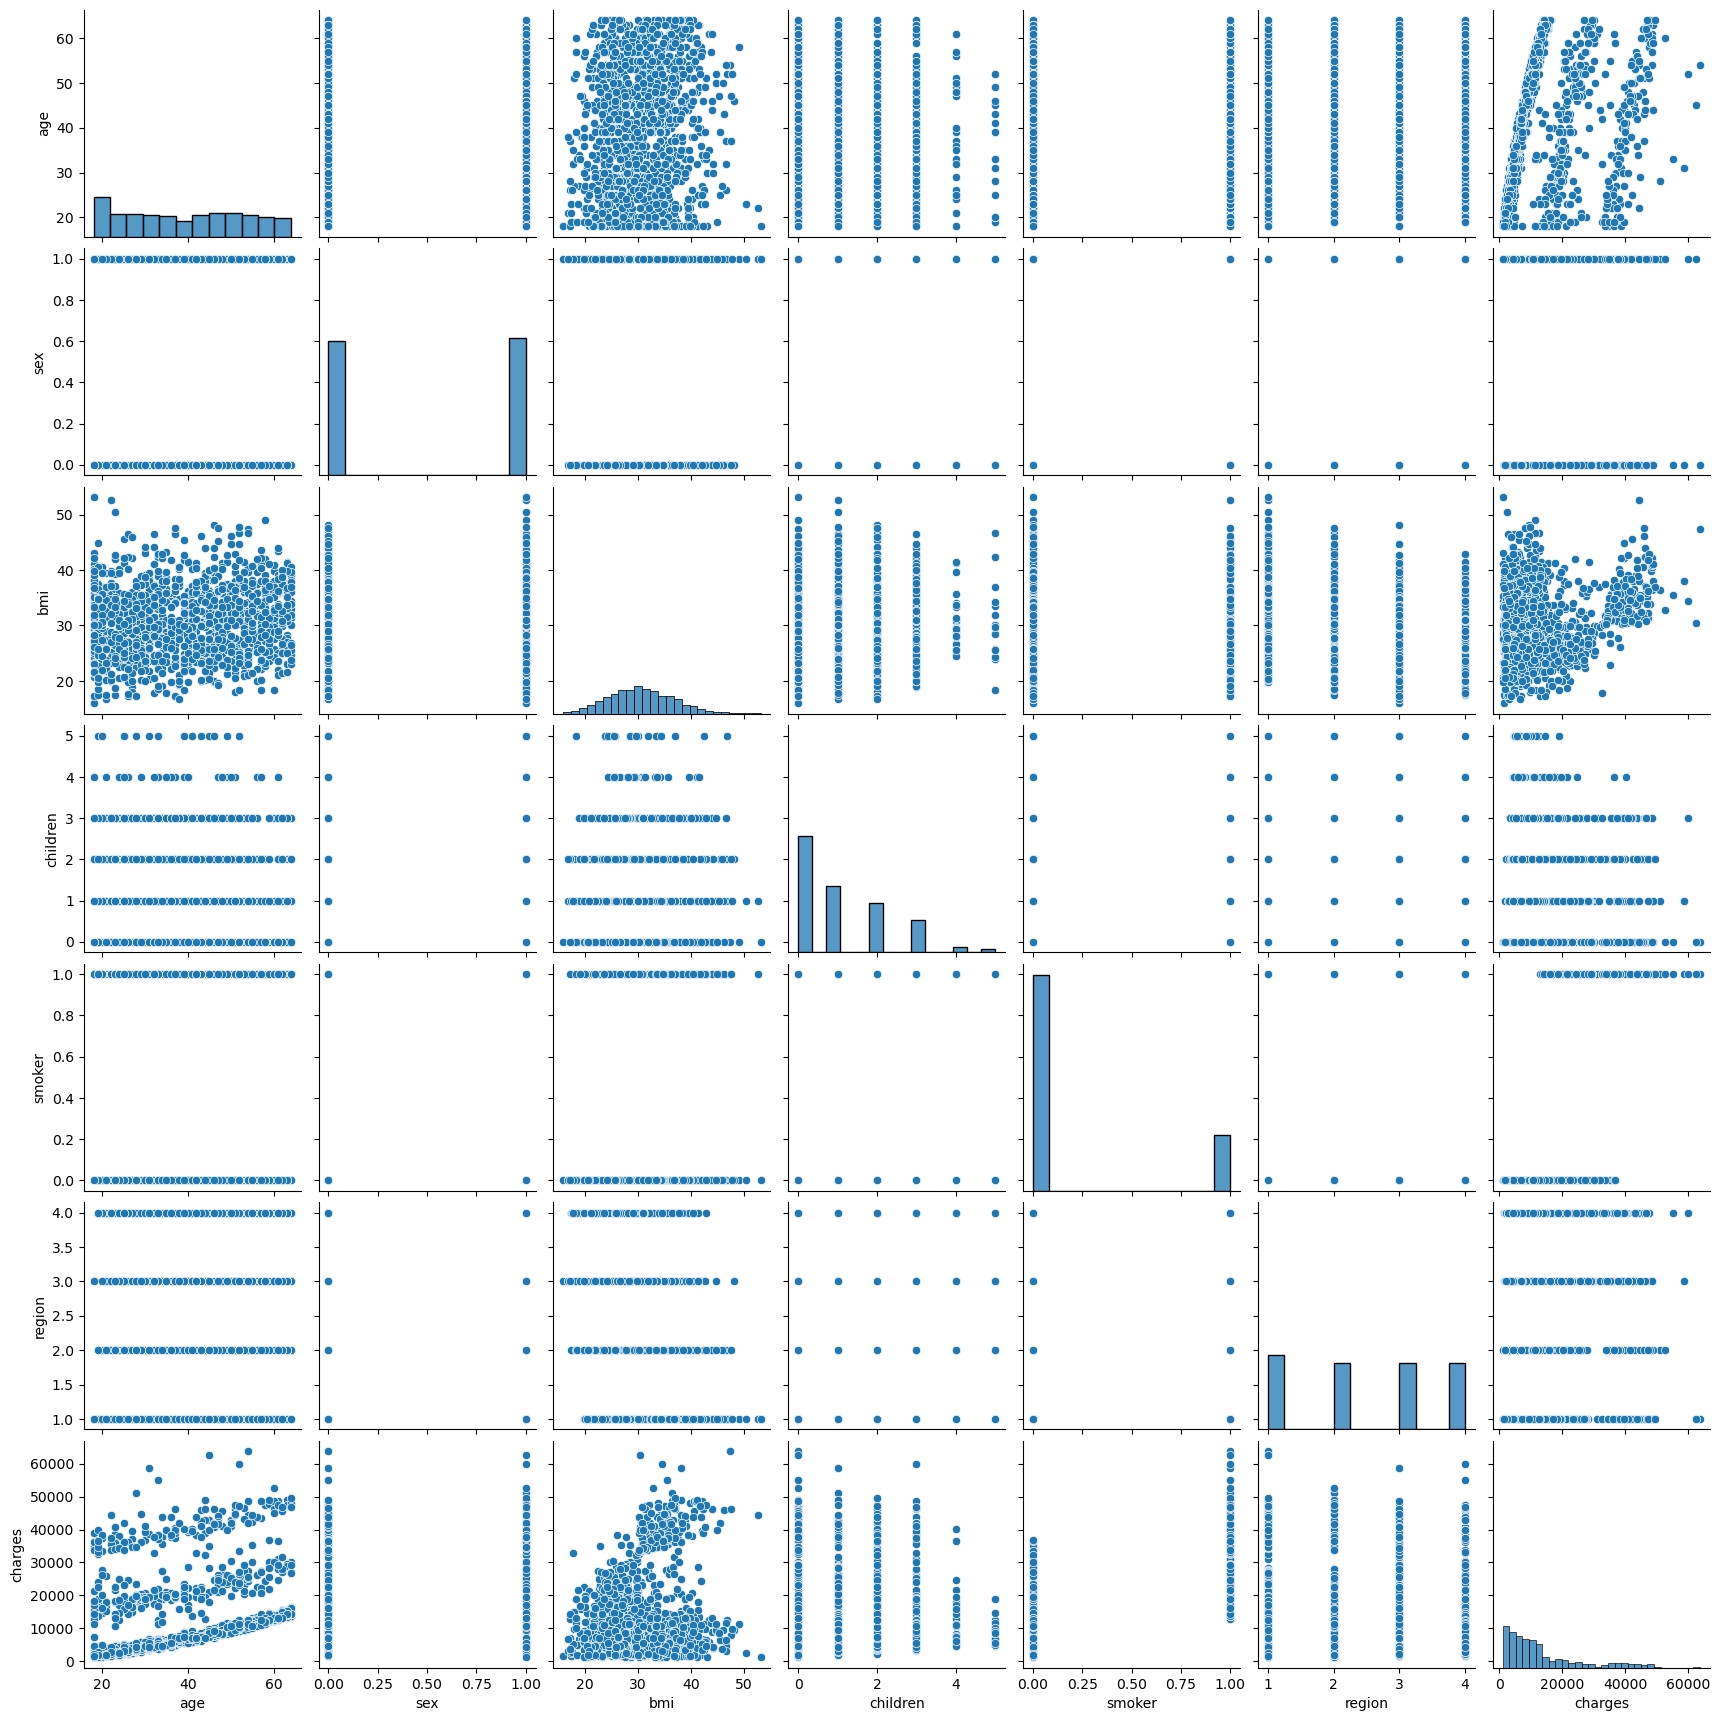

In [4]:
sns.pairplot(df);

In [5]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)

label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)

label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)


df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

CORRELATION MATRIX

In [6]:
df1 = df.drop(columns = 'charges')

In [7]:
corr = df.corr()

<Axes: title={'center': 'Correlation Matrix of Charges'}>

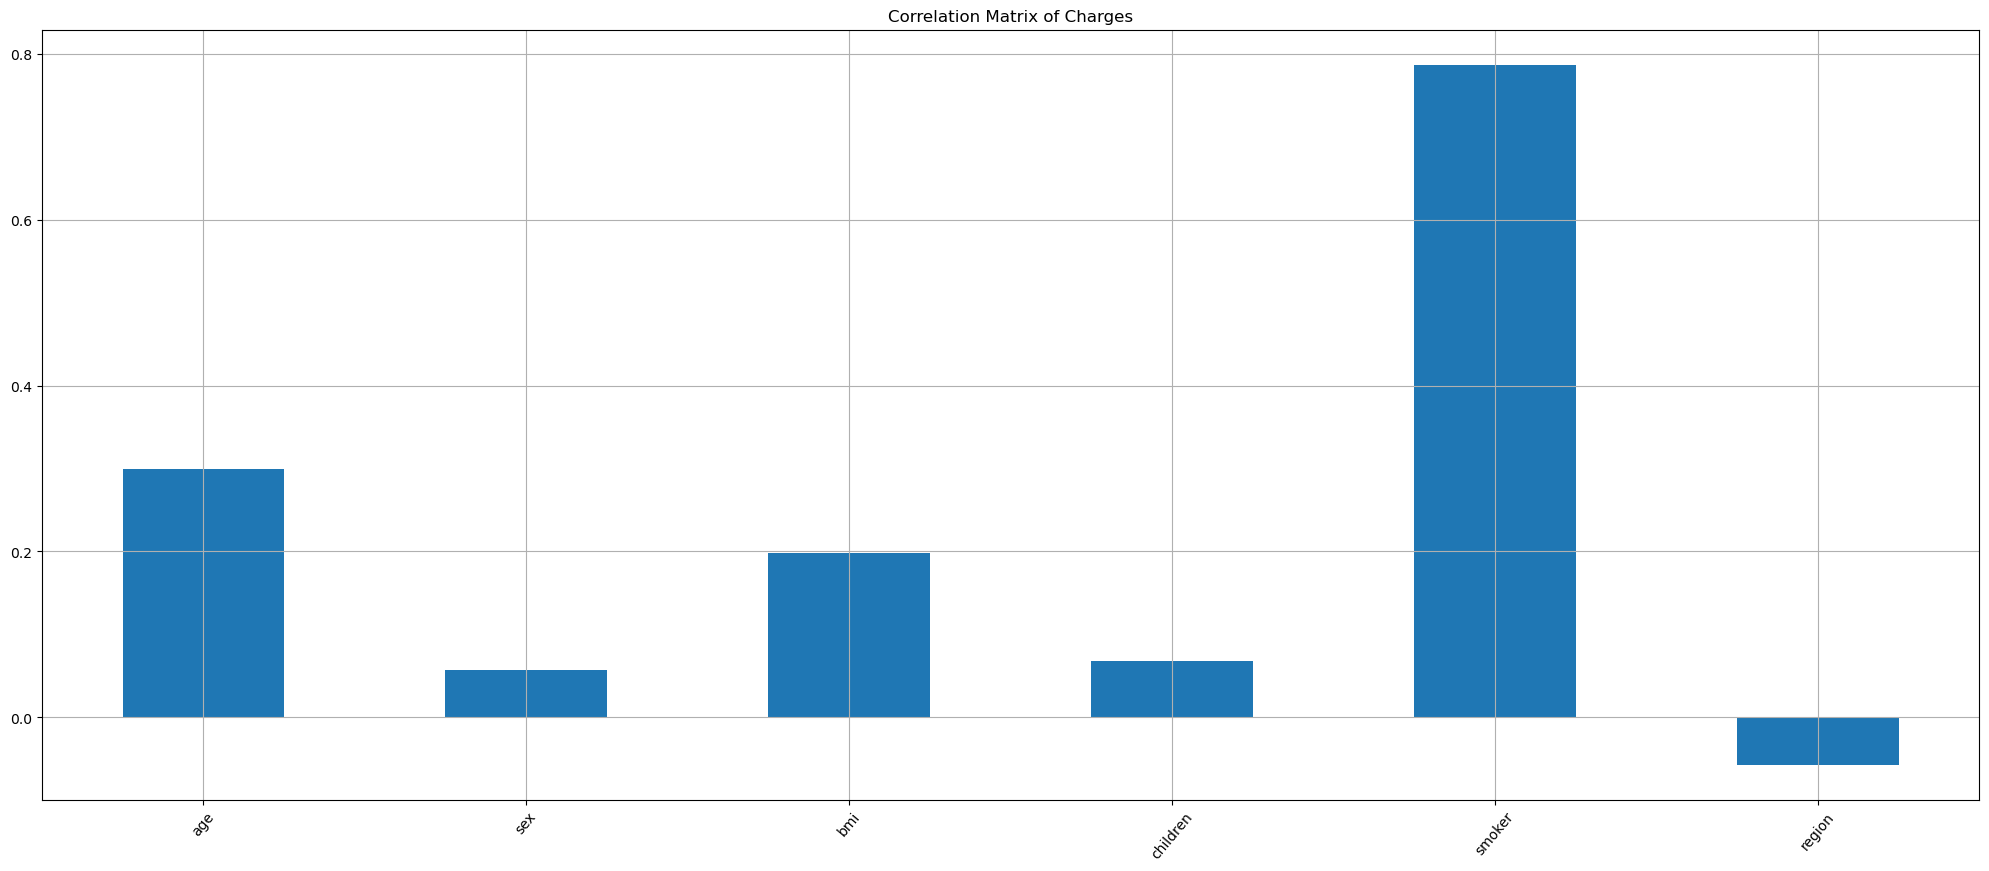

In [8]:
df1.corrwith(df['charges']).plot.bar(
    figsize = (25,10), title = 'Correlation Matrix of Charges', rot = 50,grid=True
)

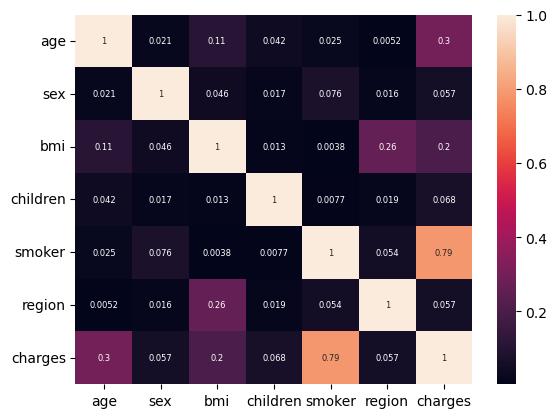

In [9]:
df_corr = df.corr().abs()
sns.heatmap(df_corr,annot=True,annot_kws={'size':6})
plt.show()


In [10]:
# Separate feature variables and target variable
X = df.drop(['charges'], axis = 1)
Y = df['charges']

In [11]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,1
1,18,1,33.770,1,0,0
2,28,1,33.000,3,0,0
3,33,1,22.705,0,0,3
4,32,1,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3
1334,18,0,31.920,0,0,2
1335,18,0,36.850,0,0,0
1336,21,0,25.800,0,0,1


In [12]:
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [139]:
#  To check multicollinearity

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [140]:
X_scaled.shape[1]

6

In [141]:
# Finding variance inflation factor in each scaled column
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i)
            for i in range(X_scaled.shape[1])]
vif["Featues"]=X.columns

In [142]:
# Lets check the values
vif

,vif,Featues
0,1.016233,age
1,1.008879,sex
2,1.090569,bmi
3,1.002749,children
4,1.009411,smoker
5,1.078627,region


LINEAR REGRESSION

In [143]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled,Y,test_size=0.25,random_state=355)

MODEL BUILDING

In [144]:
regression=LinearRegression()
regression.fit(X_train,Y_train)

LinearRegression()

In [145]:
X_train.shape

(1003, 6)

In [146]:
Y_train.shape

(1003,)

In [147]:
X_train.shape

(1003, 6)

In [148]:
Y_test.shape

(335,)

In [149]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
     

In [150]:
X_train

array([[ 1.42935296, -1.0090137 ,  0.25145374,  1.53862443, -0.51305378,
        -0.43958394],
       [ 0.5022147 ,  0.99106682, -0.95583712,  1.53862443, -0.51305378,
         0.44398859],
       [-0.42492355, -1.0090137 ,  0.94393132,  1.53862443, -0.51305378,
         0.44398859],
       ...,
       [-1.49469847,  0.99106682, -0.37491619, -0.10399431, -0.51305378,
         0.44398859],
       [ 1.57198962,  0.99106682,  0.55141718, -0.92530367, -0.51305378,
         0.44398859],
       [ 0.57353303,  0.99106682,  0.28450756, -0.10399431, -0.51305378,
        -0.43958394]])

In [151]:
X_test

array([[-0.21096857, -1.0090137 , -0.46911959, -0.92530367, -0.51305378,
         0.44398859],
       [ 1.21539798, -1.0090137 ,  0.86294945, -0.10399431, -0.51305378,
        -0.43958394],
       [ 0.07430474, -1.0090137 , -0.52531108, -0.10399431, -0.51305378,
        -0.43958394],
       ...,
       [-0.92415185,  0.99106682, -0.23609014, -0.10399431, -0.51305378,
        -1.32315647],
       [ 1.07276132,  0.99106682, -1.58138071,  0.71731506, -0.51305378,
        -1.32315647],
       [-0.78151519,  0.99106682, -1.09053145,  1.53862443,  1.9491134 ,
        -1.32315647]])

In [152]:
# adjusted R2 score
regression.score(X_train,Y_train)

0.7605761318058688

In [153]:
regression.score(X_test,Y_test)

0.715210371318481

In [154]:
# Lets plot and visualize
X_test[1]

array([ 1.21539798, -1.0090137 ,  0.86294945, -0.10399431, -0.51305378,
       -0.43958394])

In [155]:
Y_pred = regression.predict(X_test)

In [156]:
Y_pred

array([ 6149.58923885, 14465.39138308,  7348.26940292,  8889.67718092,
       35455.09847952, 11971.8359666 , 15604.02204062,  6683.10223285,
       12542.07441583, 36555.90236914,  7890.35808147,  -874.88675029,
       31096.37884655,  2416.46521485,  2694.62904248, 10666.04525322,
        5571.57236502,  3365.87130085,  2030.7209553 ,  3649.48100374,
       13242.89863724, 15290.13313796, 12288.48246954,  1985.60588968,
        6965.04209038, 11518.33233203, 15089.06864916,  6052.10730926,
        5596.19405771, 27207.59757081,  5325.97201086, 12793.10241076,
       10140.55910978, 13982.78711417,  8756.67029629, 36435.20872834,
       16786.81334611, 12109.65479238,  -404.3742744 ,  9452.91168181,
       12852.67185984,  6119.2277623 ,  3914.61214811,  5208.21354928,
       15617.63335635,  6550.09437211, 15613.45283711,  7606.29905757,
       32042.39016961, 30322.17076225, 26812.55414519,  5604.71119807,
        3579.27043896,  5556.79103976,  4260.76228334,  4060.78600717,
      

<function matplotlib.pyplot.show(close=None, block=None)>

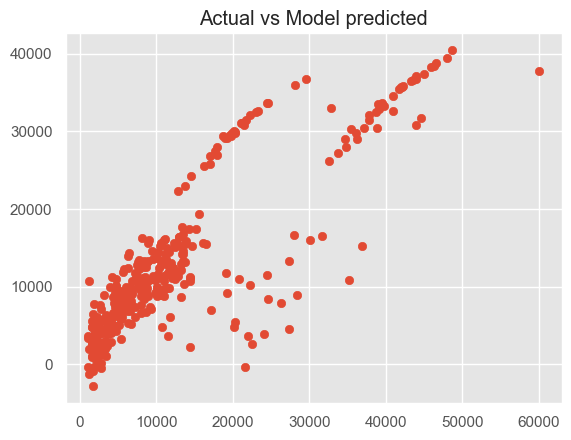

In [157]:
plt.scatter(Y_test, Y_pred)
plt.title("Actual vs Model predicted")
plt.show

In [158]:
#MAE
mean_absolute_error(Y_test, Y_pred)

4423.809811138809

In [159]:
#MSE
mean_squared_error(Y_test, Y_pred)

39872533.86673098

In [160]:
#RMSE
np.sqrt(mean_squared_error(Y_test, Y_pred))

6314.470196836072

In [161]:
r2_score(Y_test, Y_pred)

0.715210371318481

LASSO REGRESSION

In [162]:
lassocv=LassoCV(alphas=None,max_iter=10)
lassocv.fit(X_train,Y_train)

LassoCV(max_iter=10)

In [163]:
# best alpha parameter
alpha=lassocv.alpha_
alpha

73.22536545899057

In [164]:
!pip install xgboost

In [165]:
def model_evaluation_result(model):
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    
    # Mean Squared Error
    MSE = mean_squared_error(Y_test, Y_pred)
    
    # Mean Absolute Error
    MAE = mean_absolute_error(Y_test, Y_pred)
    
    # R^2 - Coefficient of Determination
    R2 = r2_score(Y_test, Y_pred)
    
    # Root Mean Squared Error(RMSE)
    RMSE = np.sqrt(mean_squared_error(Y_test, Y_pred))
    
    
    
    
    print(f"{model} Model Scores")
    print("")
    print(f"Mean Squared Error            : {MSE:.0f}")
    print(f"Mean Absolute Error           : {MAE:.0f}")
    print(f"Root Mean Squared Error       : {RMSE:.0f}")
    print(f"R2 Score                      : {R2*100:.2f}%")

In [166]:
Linear_Regression = LinearRegression()
Decision_Tree = DecisionTreeRegressor()
Random_Forest = RandomForestRegressor()
Ridge_Regression = Ridge()
Lasso_Regression = Lasso()
Xgboost_Regression = XGBRFRegressor()

In [167]:
model_evaluation_result(Linear_Regression)

LinearRegression() Model Scores

Mean Squared Error            : 39855825
Mean Absolute Error           : 4411
Root Mean Squared Error       : 6313
R2 Score                      : 71.53%


In [169]:
model_evaluation_result(Decision_Tree)

DecisionTreeRegressor() Model Scores

Mean Squared Error            : 48527129
Mean Absolute Error           : 3245
Root Mean Squared Error       : 6966
R2 Score                      : 65.34%


In [170]:
model_evaluation_result(Random_Forest)

RandomForestRegressor() Model Scores

Mean Squared Error            : 25143319
Mean Absolute Error           : 2817
Root Mean Squared Error       : 5014
R2 Score                      : 82.04%


In [171]:
model_evaluation_result(Ridge_Regression)

Ridge() Model Scores

Mean Squared Error            : 39854795
Mean Absolute Error           : 4412
Root Mean Squared Error       : 6313
R2 Score                      : 71.53%


In [172]:
model_evaluation_result(Lasso_Regression)

Lasso() Model Scores

Mean Squared Error            : 39857042
Mean Absolute Error           : 4411
Root Mean Squared Error       : 6313
R2 Score                      : 71.53%


In [92]:
model_evaluation_result(Xgboost_Regression)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...) Model Scores

Mean Squared Error            : 22737196
Mean Absolute Error           : 2619
Root Mean Squared Error       : 4768
R2 Score                      : 83.76%


In [173]:
results = pd.DataFrame({
    'Model': ['Linear Regression','Decision_Tree', 'Random_Forest','Ridge_Regression' ,'Lasso_Regression','Xgboost_Regression'],
    'R2 Score': [71.53,66.87,81.22,71.53,71.53,83.76]})

result_df = results.sort_values(by='R2 Score', ascending=False)
result_df = result_df.set_index('R2 Score')
result_df


,Model
R2 Score,
83.76,Xgboost_Regression
81.22,Random_Forest
71.53,Linear Regression
71.53,Ridge_Regression
71.53,Lasso_Regression
66.87,Decision_Tree


Hence, XGB  regressor test give highest model accuracy